In [1]:
def processText(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [2]:
import pandas as pd
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import numpy as np
import math
from collections import Counter

import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# load csv file
fCsvName = 'dataFromReddit_programming.csv'

# tweet to use
postTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']
# we use the popular Porter stemmer
postStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()

In [7]:
# read csv data
csvPD=pd.read_csv(fCsvName)

# this will store the list of posts we read from subreddit
lPosts = []


data_list = csvPD['Title'].tolist()+csvPD['Body'].tolist()+csvPD['TopComment'].tolist()
data_list = [x for x in data_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]

# print out the hot submisisons
for submission in data_list:
    # tokenise, filter stopwords and get convert to lower case
    lTokens = processText(text=submission, tokenizer=postTokeniser, stemmer=postStemmer, stopwords=lStopwords)
    lPosts.append(' '.join(lTokens))


In [8]:
# LDA
# number of topics to discover (default = 10)
topicNum = 8
# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 15
# this is the number of features/words to used to describe our documents
# please feel free to change to see effect
featureNum = 1500

In [9]:
for topic_num in range(1,10):
    tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
    tf = tfVectorizer.fit_transform(lPosts)
    # extract the names of the features (in our case, the words)
    tfFeatureNames = tfVectorizer.get_feature_names_out()


    #
    # LDA MODEL
    #

    # Run LDA (see documentation about what the arguments means)
    ldaModel = LatentDirichletAllocation(n_components =topic_num, max_iter=10, learning_method='online').fit(tf)
    print('topic num: ',topic_num, '\nperplexity: ', ldaModel.perplexity(tf), '\nscore: ', ldaModel.score(tf))

topic num:  1 
perplexity:  1000.4027016346755 
score:  -123538.58771772904
topic num:  2 
perplexity:  1090.7014229127574 
score:  -125084.00753513465
topic num:  3 
perplexity:  1158.8985163005862 
score:  -126168.59364780203
topic num:  4 
perplexity:  1257.120635332372 
score:  -127623.44538320942
topic num:  5 
perplexity:  1318.0627551652765 
score:  -128470.01145717663
topic num:  6 
perplexity:  1309.22592412587 
score:  -128349.71280354596
topic num:  7 
perplexity:  1354.4546650054524 
score:  -128957.07039861774
topic num:  8 
perplexity:  1405.2424333231254 
score:  -129615.36019250879
topic num:  9 
perplexity:  1398.1271837654924 
score:  -129524.58209439798


In [10]:
topicNum = 6

In [11]:
#
# Count Vectorizer
#

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names_out()


#
# LDA MODEL
#

# Run LDA (see documentation about what the arguments means)
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [7]:
# import torchvision.models as models

In [8]:
# import gensim

In [9]:
# build a dictionary which for each tweet, each word has its own id.
# tweets_dictionary = gensim.corpora.Dictionary(csvPD['Title'])  

# # build the corpus, i.e. vectors with the number of occurence of each word per tweet
# bow_corpus = [tweets_dictionary.doc2bow(doc) for doc in csvPD['Title']]

# tweets_coherence = []
# for n in range(5, 15):   
#     # Multi-core implementation:
#     lda = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)
    
#     # ompute coherence for each lda model with different number of topics
#     cohm = CoherenceModel(model = lda, corpus = bow_corpus, dictionary = tweets_dictionary, coherence = 'u_mass')
#     coh = cohm.get_coherence()
#     tweets_coherence.append(coh)

In [14]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [15]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
https com www http org github linux version en releas site wikipedia instal content link
Topic 1:
mani got comput softwar import use perform program tri number seen memori best video die
Topic 2:
thi code use develop whi wa ha good manag open hi engin user edit work
Topic 3:
thi work use like peopl time way know thing make actual new post realli compani
Topic 4:
thi wa code read becaus like sourc window microsoft hope languag github work file run
Topic 5:
cours free api year ani end built firefox old code github sourc thi youtube command


In [16]:
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [17]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]
    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 1
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black',scale=25)
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
    plt.rcParams['figure.figsize']=(10.0,18.0)
    plt.show(block=True)
    print()

E:\ProgrammingEnvironment\Anaconda\envs\DataScience\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
E:\ProgrammingEnvironment\Anaconda\envs\DataScience\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
E:\ProgrammingEnvironment\Anaconda\envs\DataScience\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.co

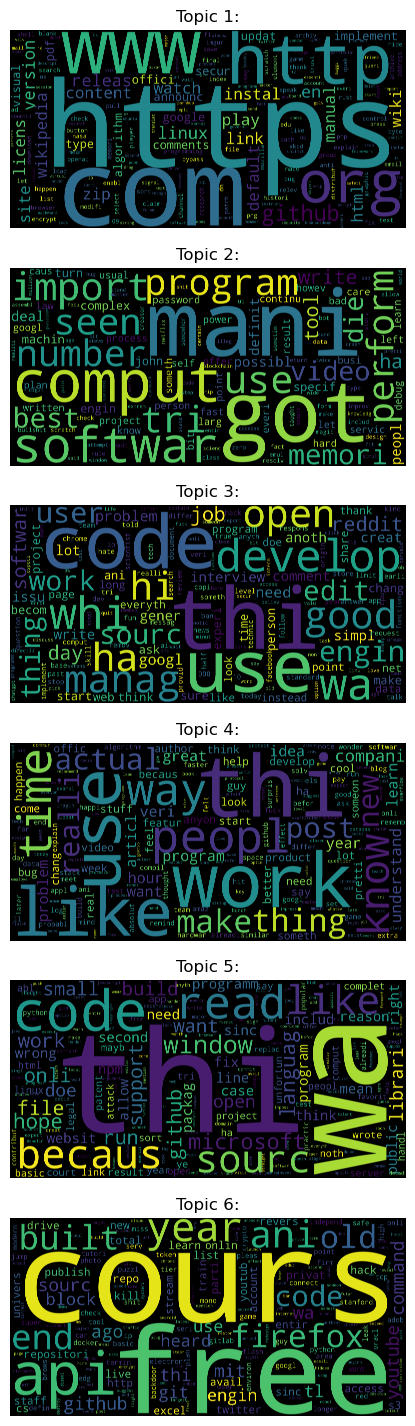

In [19]:
# display wordcloud
displayWordcloud(ldaModel, tfFeatureNames)